In [57]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pylab as plt2
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor  
import graphviz
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from ggplot import *
import pydotplus

from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn import metrics  
from sklearn.model_selection import train_test_split  


In [58]:
# Import data

mp  = pd.read_csv('/Users/Felicia/Documents/Felicia Zhang/Felicia/Princeton/ConsultingClub/Mindprint/Mindprint_ScaledScores_YesCombo_112118.csv')
mp.set_index('customer_id', inplace=True)

print('Data size:',len(mp), 'rows') 

Data size: 247 rows


In [59]:
mp.head()

,age,SM_Sz,SM_SCORE,VMEM_Az,VMEM_Sz,VMEM_efficiency,VMEM_SCORE,ABF_Az,ABF_Sz,ABF_efficiency,...,DEPRESSION,ACTversion,EngRaw,MathRaw,ReadingRaw,ScienceRaw,EngScaledScore,MathScaledScore,ReadingScaledScore,ScienceScaledScore
customer_id,,,,,,,,,,,,,,,,,,,,,
512,15,1.0190,medium_strength,0.6298,0.3895,0.50965,high_expected,-0.0704,-0.1611,-0.11575,...,0,70G,67.0,44.0,36.0,26.0,29,26.0,31.0,24.0
512,15,1.0190,medium_strength,0.6298,0.3895,0.50965,high_expected,-0.0704,-0.1611,-0.11575,...,0,Combo,56.0,33.0,54.0,46.0,18,16.0,21.0,19.0
513,16,0.7039,high_expected,0.9644,1.1184,1.04140,high_expected,1.0407,1.0965,1.06860,...,0,71E,59.0,36.0,29.0,15.0,26,23.0,25.0,18.0
517,17,1.7537,high_strength,0.6250,1.0837,0.85435,high_expected,0.9616,0.2867,0.62415,...,0,71A,70.0,44.0,35.0,27.0,32,27.0,31.0,24.0
677,16,0.6158,high_expected,-0.0539,0.6653,0.30570,medium_expected,-1.9930,0.8253,-0.58385,...,0,71C,51.0,23.0,30.0,18.0,22,17.0,27.0,19.0


In [60]:
# Label students who received extra time: 2507 (don't have data), 2421, 4499, 6150, 517, 2010, 2948, 6171, 5866, 4967, 2720, 1872, 6808
mp['ExtraTime'] = 0

mp.loc[2421, 'ExtraTime'] = 1
mp.loc[4499, 'ExtraTime'] = 1
mp.loc[6150, 'ExtraTime'] = 1
mp.loc[517, 'ExtraTime'] = 1
mp.loc[2010, 'ExtraTime'] = 1
mp.loc[2948, 'ExtraTime'] = 1
mp.loc[6171, 'ExtraTime'] = 1
mp.loc[5866, 'ExtraTime'] = 1
mp.loc[4967, 'ExtraTime'] = 1
mp.loc[2720, 'ExtraTime'] = 1
mp.loc[1872, 'ExtraTime'] = 1
mp.loc[6808, 'ExtraTime'] = 1
mp.loc[8568, 'ExtraTime'] = 1
mp.loc[10266, 'ExtraTime'] = 1
mp.loc[8409, 'ExtraTime'] = 1

print('Number of students who received extra time:',len(mp.loc[mp['ExtraTime'] == 1]))

Number of students who received extra time: 17


In [61]:
# Replace outlier Mindprint scores (accuracy scores with < -2 with -2)
# 1901: WM_Az, 5143: ATT_Az, 1902: ATT_Az, 6381: ATT_Az

print(mp.loc[1901, 'WM_Az'], mp.loc[5143, 'ATT_Az'], mp.loc[1902, 'ATT_Az'], mp.loc[6381, 'ATT_Az'])

mp.loc[1901, 'WM_Az'] = -2
mp.loc[5143, 'ATT_Az'] = -2
mp.loc[1902, 'ATT_Az'] = -2
mp.loc[6381, 'ATT_Az'] = -2

print(mp.loc[1901, 'WM_Az'], mp.loc[5143, 'ATT_Az'], mp.loc[1902, 'ATT_Az'], mp.loc[6381, 'ATT_Az'])

-6.8829 -4.2585 -4.2585 customer_id
6381   -5.6713
6381   -5.6713
6381   -5.6713
6381   -5.6713
6381   -5.6713
6381   -5.6713
6381   -5.6713
Name: ATT_Az, dtype: float64
-2.0 -2.0 -2.0 customer_id
6381   -2.0
6381   -2.0
6381   -2.0
6381   -2.0
6381   -2.0
6381   -2.0
6381   -2.0
Name: ATT_Az, dtype: float64


In [62]:
# Calculate descriptive statistics

mp.describe().round(1)

,age,SM_Sz,VMEM_Az,VMEM_Sz,VMEM_efficiency,ABF_Az,ABF_Sz,ABF_efficiency,LAN_Az,LAN_Sz,...,DEPRESSION,EngRaw,MathRaw,ReadingRaw,ScienceRaw,EngScaledScore,MathScaledScore,ReadingScaledScore,ScienceScaledScore,ExtraTime
count,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,...,247.0,236.0,235.0,235.0,231.0,247.0,246.0,246.0,242.0,247.0
mean,16.2,0.7,0.2,0.3,0.3,0.2,0.4,0.3,0.5,0.1,...,0.1,56.5,40.1,32.1,30.4,23.4,23.3,23.3,22.6,0.1
std,0.8,0.6,0.7,0.6,0.5,1.1,0.9,0.7,0.5,0.8,...,0.4,12.9,11.4,16.0,15.5,5.2,4.5,5.1,3.8,0.3
min,14.0,-1.7,-3.1,-1.6,-1.6,-3.9,-3.7,-3.2,-1.4,-3.4,...,0.0,24.0,14.0,8.0,6.0,10.0,13.0,9.0,10.0,0.0
25%,16.0,0.4,-0.1,-0.1,-0.1,-0.2,-0.0,0.0,0.2,-0.3,...,0.0,49.0,34.0,22.0,21.0,20.0,20.0,20.0,20.0,0.0
50%,16.0,0.9,0.6,0.4,0.4,0.5,0.6,0.4,0.6,0.3,...,0.0,56.5,39.0,27.0,26.0,23.0,24.0,23.0,23.0,0.0
75%,17.0,1.2,0.6,0.8,0.7,0.9,0.9,0.8,1.0,0.8,...,0.0,65.0,46.0,35.0,32.0,27.0,27.0,27.0,25.0,0.0
max,21.0,2.0,1.0,1.5,1.2,2.5,3.4,1.8,1.1,1.4,...,2.0,95.0,87.0,96.0,100.0,35.0,35.0,34.0,36.0,1.0


In [63]:
# Only want the scaled subject scores
scores = mp.iloc[:,[-5,-4,-3,-2,-1]]

# Calculate TotalScore which is a mean of the 4 subject tests
scores['TotalScore'] = scores.mean(axis=1).astype(int) 
scores.head()

/Users/Felicia/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,EngScaledScore,MathScaledScore,ReadingScaledScore,ScienceScaledScore,ExtraTime,TotalScore
customer_id,,,,,,
512,29,26.0,31.0,24.0,0,22
512,18,16.0,21.0,19.0,0,14
513,26,23.0,25.0,18.0,0,18
517,32,27.0,31.0,24.0,1,23
677,22,17.0,27.0,19.0,0,17


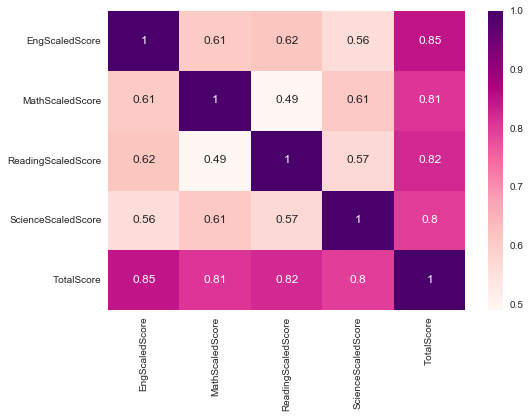

In [64]:
# Heatmap
# remove extratime column for the heatmap
scores2 = scores.drop('ExtraTime', 1)

fig = sns.heatmap(scores2.corr(),annot=True, cmap='RdPu')
plt2.show()

In [65]:
# Create 4 dataframes, 1 for each ACT subject test

EngScores = mp.copy()
EngScores = EngScores.drop(['MathScaledScore', 'ReadingScaledScore','ScienceScaledScore'], 1)
EngScores = EngScores.dropna(subset=['EngScaledScore']) 

MathScores = mp.copy()
MathScores = MathScores.drop(['EngScaledScore', 'ReadingScaledScore','ScienceScaledScore'], 1)
MathScores = MathScores.dropna(subset=['MathScaledScore']) 

ReadingScores = mp.copy()
ReadingScores = ReadingScores.drop(['MathScaledScore', 'EngScaledScore','ScienceScaledScore'], 1)
ReadingScores = ReadingScores.dropna(subset=['ReadingScaledScore']) 

ScienceScores = mp.copy()
ScienceScores = ScienceScores.drop(['MathScaledScore', 'ReadingScaledScore','EngScaledScore'], 1)
ScienceScores = ScienceScores.dropna(subset=['ScienceScaledScore']) 

print('Number of students in English:',len(EngScores))
print('Number of students in Math:',len(MathScores))
print('Number of students in Reading:',len(ReadingScores))
print('Number of students in Science:',len(ScienceScores))

Number of students in English: 247
Number of students in Math: 246
Number of students in Reading: 246
Number of students in Science: 242


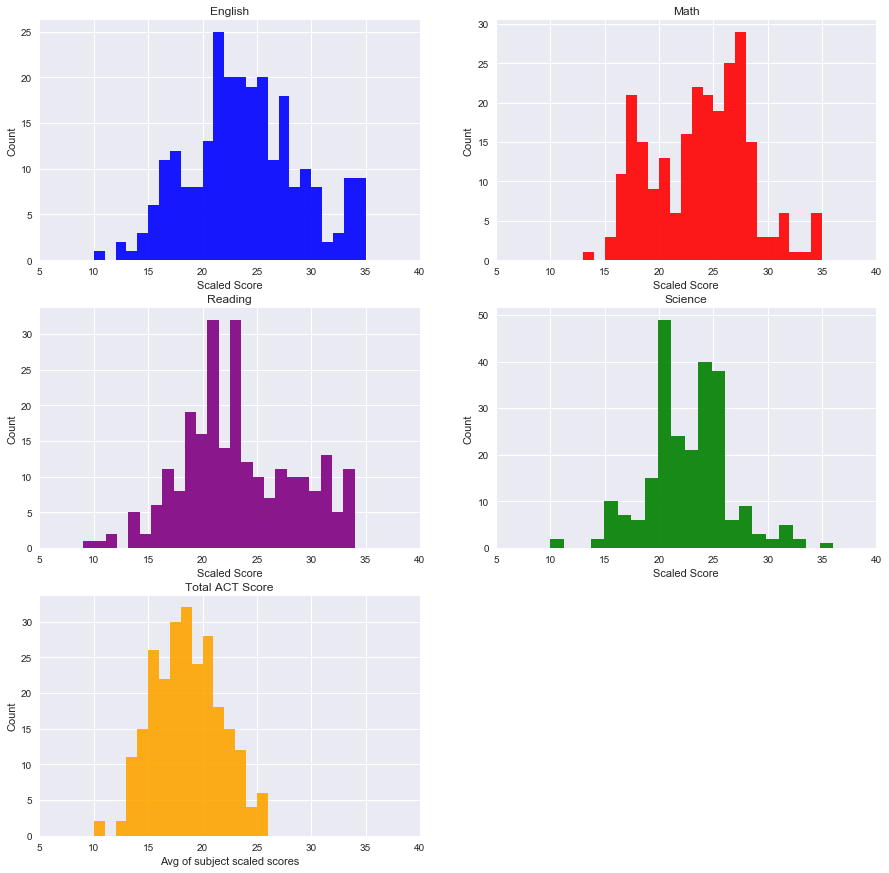

In [66]:
# Plot distribution of subject scores
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(321)
ax2 = fig1.add_subplot(322)
ax3 = fig1.add_subplot(323)
ax4 = fig1.add_subplot(324)
ax5 = fig1.add_subplot(325)

x = EngScores.loc[:,'EngScaledScore']
n, bins, patches = ax1.hist(x, len(EngScores.EngScaledScore.unique()), facecolor='blue', alpha=0.9)
ax1.set_title("English")
ax1.set_ylabel("Count")
ax1.set_xlabel("Scaled Score")
ax1.set_xlim(5,40,5)

x = MathScores.loc[:,'MathScaledScore']
n, bins, patches = ax2.hist(x, len(MathScores.MathScaledScore.unique()), facecolor='red', alpha=0.9)
ax2.set_title("Math")
ax2.set_ylabel("Count")
ax2.set_xlabel("Scaled Score")
ax2.set_xlim(5,40,5)

x = ReadingScores.loc[:,'ReadingScaledScore']
n, bins, patches = ax3.hist(x, len(ReadingScores.ReadingScaledScore.unique()), facecolor='purple', alpha=0.9)
ax3.set_title("Reading")
ax3.set_ylabel("Count")
ax3.set_xlabel("Scaled Score")
ax3.set_xlim(5,40,5)

x = ScienceScores.loc[:,'ScienceScaledScore']
n, bins, patches = ax4.hist(x, len(ScienceScores.ScienceScaledScore.unique()), facecolor='green', alpha=0.9)
ax4.set_title("Science")
ax4.set_ylabel("Count")
ax4.set_xlabel("Scaled Score")
ax4.set_xlim(5,40,5)

x = scores.loc[:,'TotalScore']
n, bins, patches = ax5.hist(x, len(scores.TotalScore.unique()), facecolor='orange', alpha=0.9)
ax5.set_title("Total ACT Score")
ax5.set_ylabel("Count")
ax5.set_xlabel("Avg of subject scaled scores")
ax5.set_xlim(5,40,5)

plt.show()

# Tree Model

In [67]:
###### Plan ######
# Use regression tree, 
# combine speed, accuracy and efficiency together
# Instead of trying to control tree depth, set sample split to 20 and 10
# run model with and without students who received extra time
# Instead of using 1 data frame for each ACT subject test we are using 4 data frames, one for each subject test

In [68]:
# drop processing speed
EngScores = EngScores.drop('PROCESSING_SPEED_Sz', axis=1) 
MathScores = MathScores.drop('PROCESSING_SPEED_Sz', axis=1) 
ReadingScores = ReadingScores.drop('PROCESSING_SPEED_Sz', axis=1) 
ScienceScores = ScienceScores.drop('PROCESSING_SPEED_Sz', axis=1) 

## Reading - All subjects

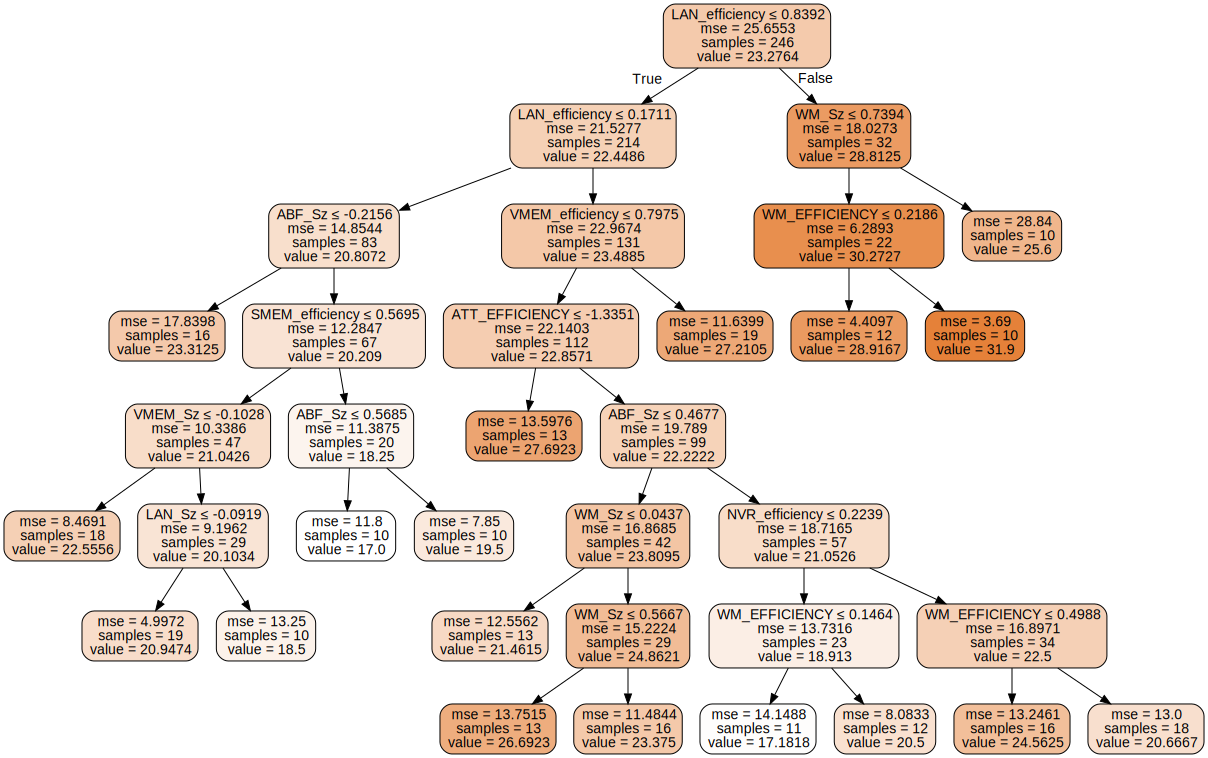

In [69]:
# load data
X = ReadingScores.loc[:, ReadingScores.columns.str.contains('_Az|_Sz|_EFFICIENCY|_efficiency')].copy()
y = ReadingScores.loc[:, 'ReadingScaledScore'].copy()
  
# Build final tree with min_sample = 10
foo = tree.DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=10)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

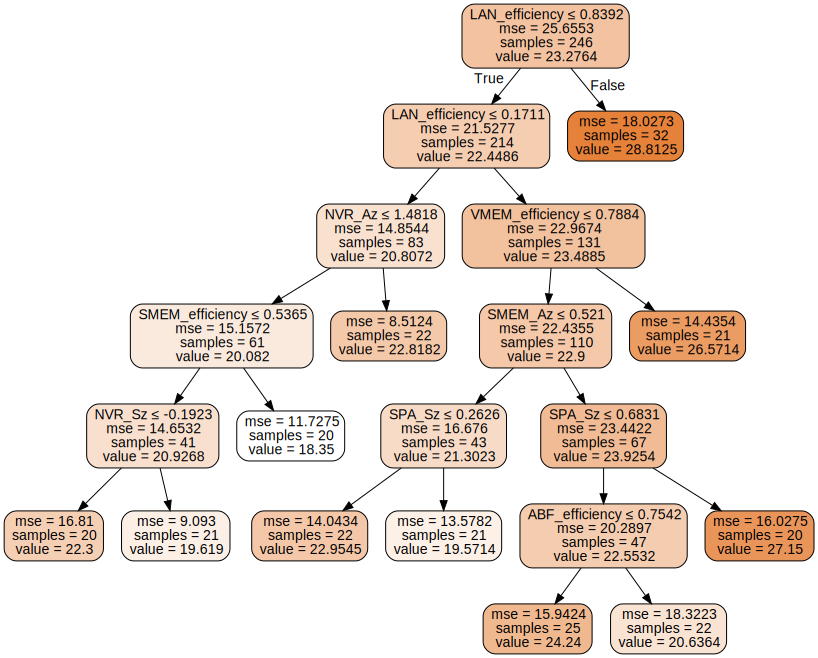

In [70]:
# Build final tree with min_sample = 20
foo = tree.DecisionTreeRegressor(min_samples_split=20, min_samples_leaf=20)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

## Reading - Removed extra time students

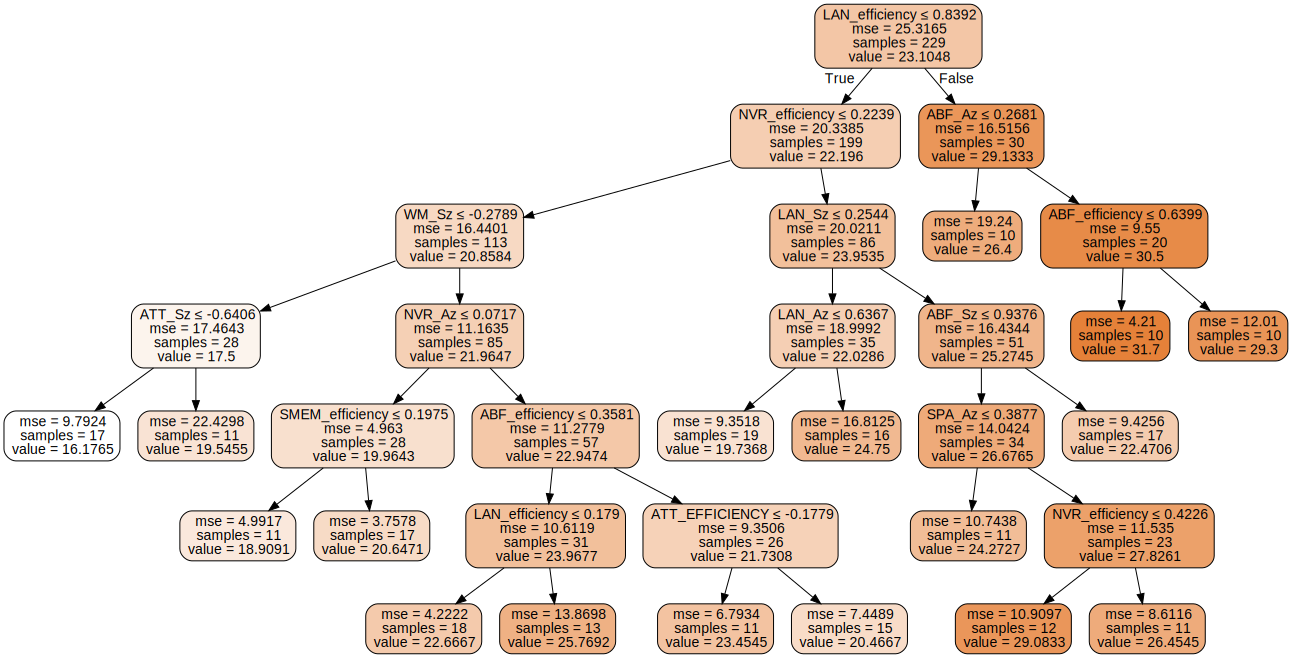

In [71]:
# load data
# drop students who received extra time
mp2 = ReadingScores[ReadingScores.ExtraTime != 1]

X = mp2.loc[:, mp2.columns.str.contains('_Az|_Sz|_EFFICIENCY|_efficiency')].copy()
y = mp2.loc[:, 'ReadingScaledScore'].copy()

# Build final tree with min_sample = 10
foo = tree.DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=10)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

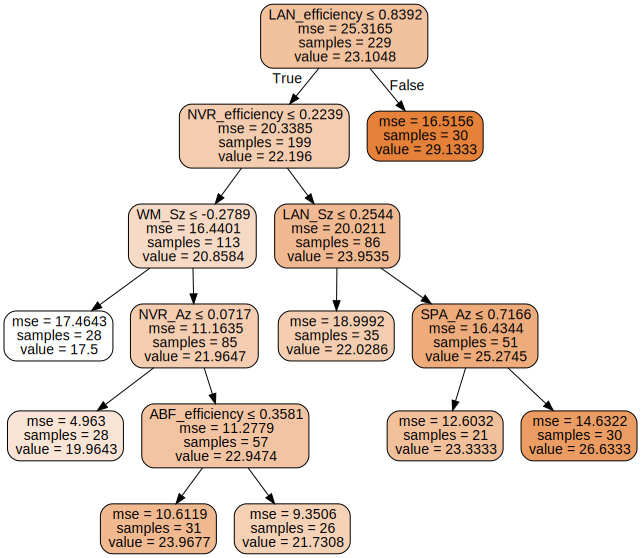

In [72]:
# Build final tree with min_sample = 20
foo = tree.DecisionTreeRegressor(min_samples_split=20, min_samples_leaf=20)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

## Math 

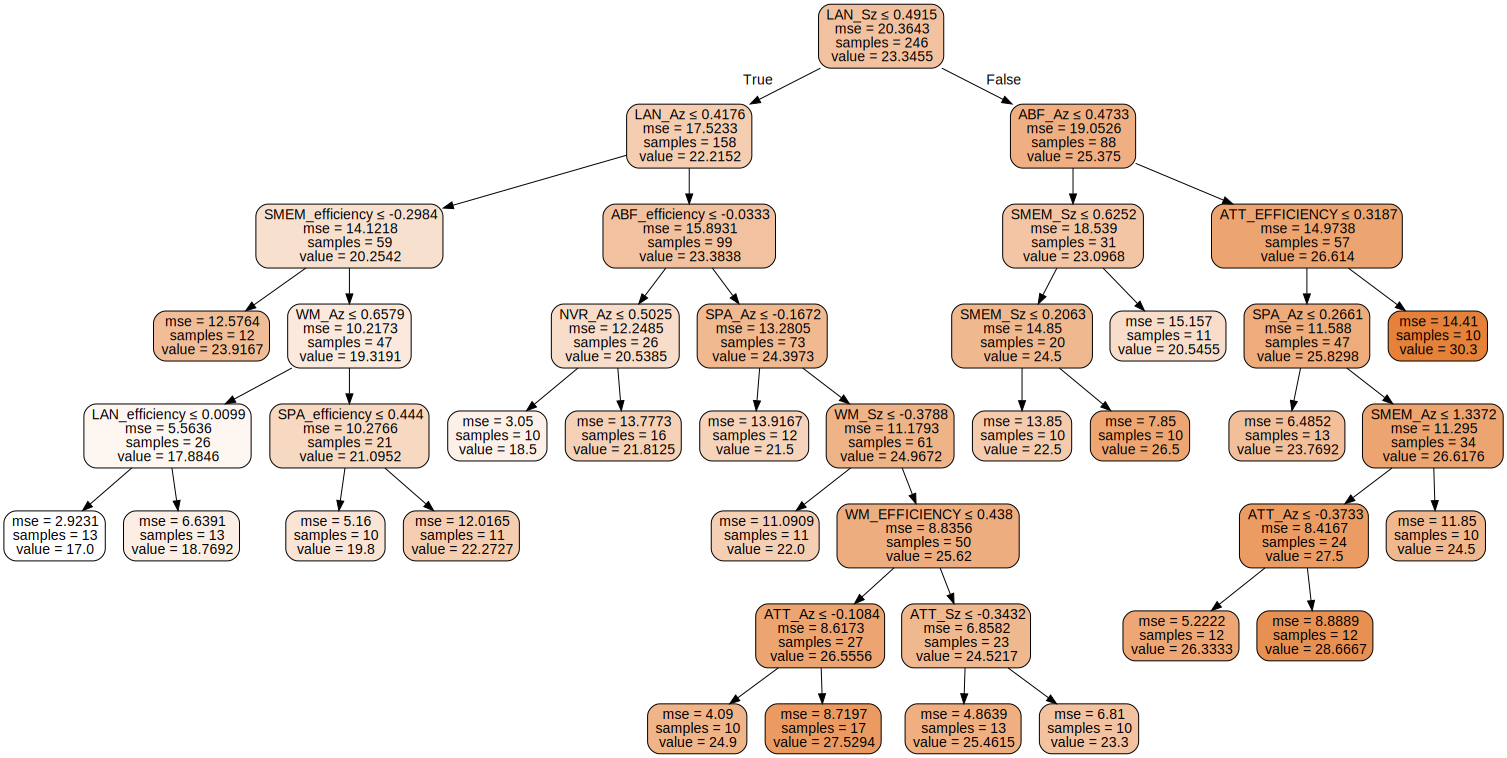

In [73]:
# load data
X = MathScores.loc[:, MathScores.columns.str.contains('_Az|_Sz|_EFFICIENCY|_efficiency')].copy()
y = MathScores.loc[:, 'MathScaledScore'].copy()

# Build final tree with min_sample = 10
foo = tree.DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=10)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

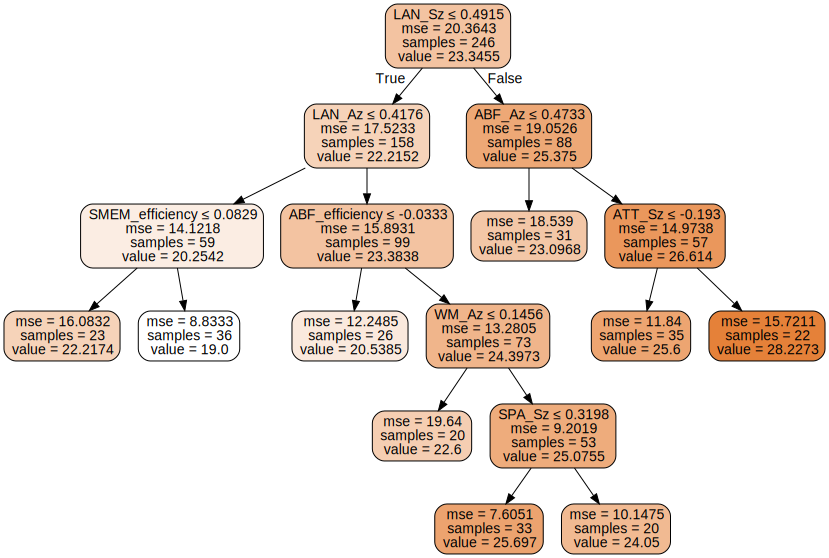

In [74]:
# Build final tree with min_sample = 20
foo = tree.DecisionTreeRegressor(min_samples_split=20, min_samples_leaf=20)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

## Math - Removed extra time students

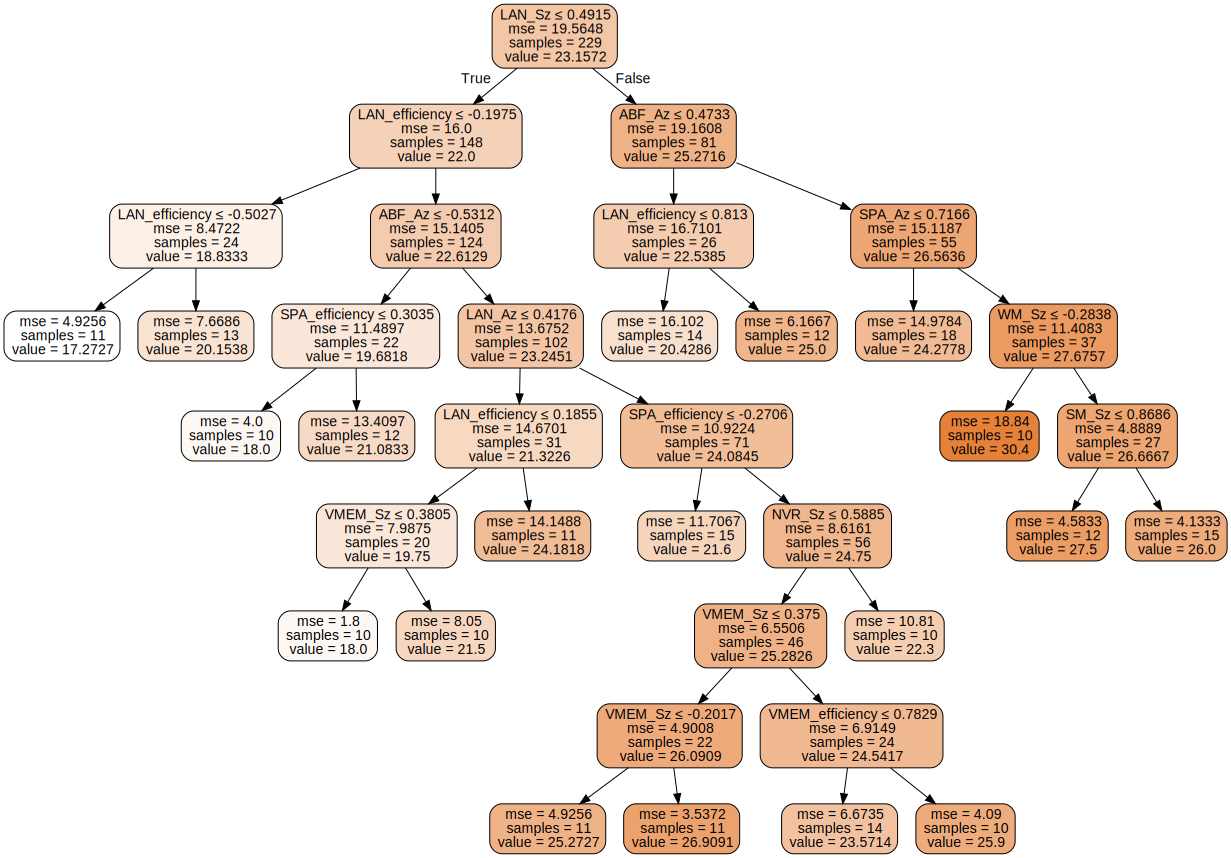

In [75]:
# load data
# drop students who received extra time
mp2 = MathScores[MathScores.ExtraTime != 1]

X = mp2.loc[:, mp2.columns.str.contains('_Az|_Sz|_EFFICIENCY|_efficiency')].copy()
y = mp2.loc[:, 'MathScaledScore'].copy()

# Build final tree with min_sample = 10
foo = tree.DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=10)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

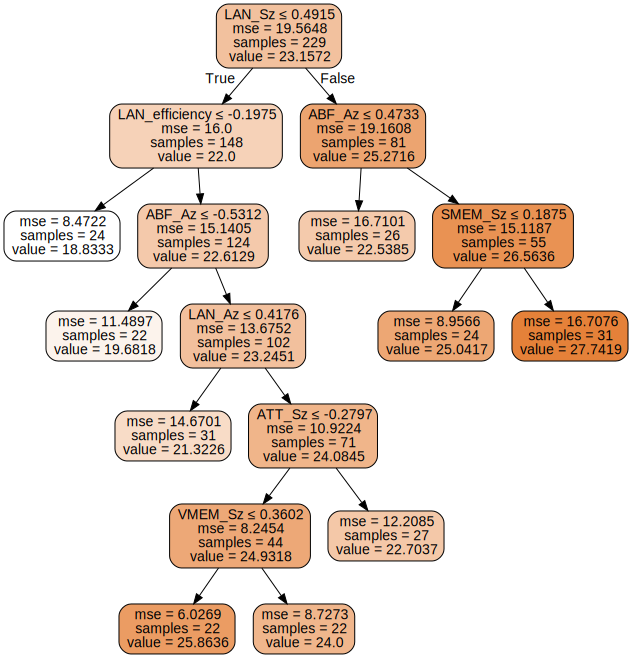

In [76]:
# Build final tree with min_sample = 20
foo = tree.DecisionTreeRegressor(min_samples_split=20, min_samples_leaf=20)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

## Science 

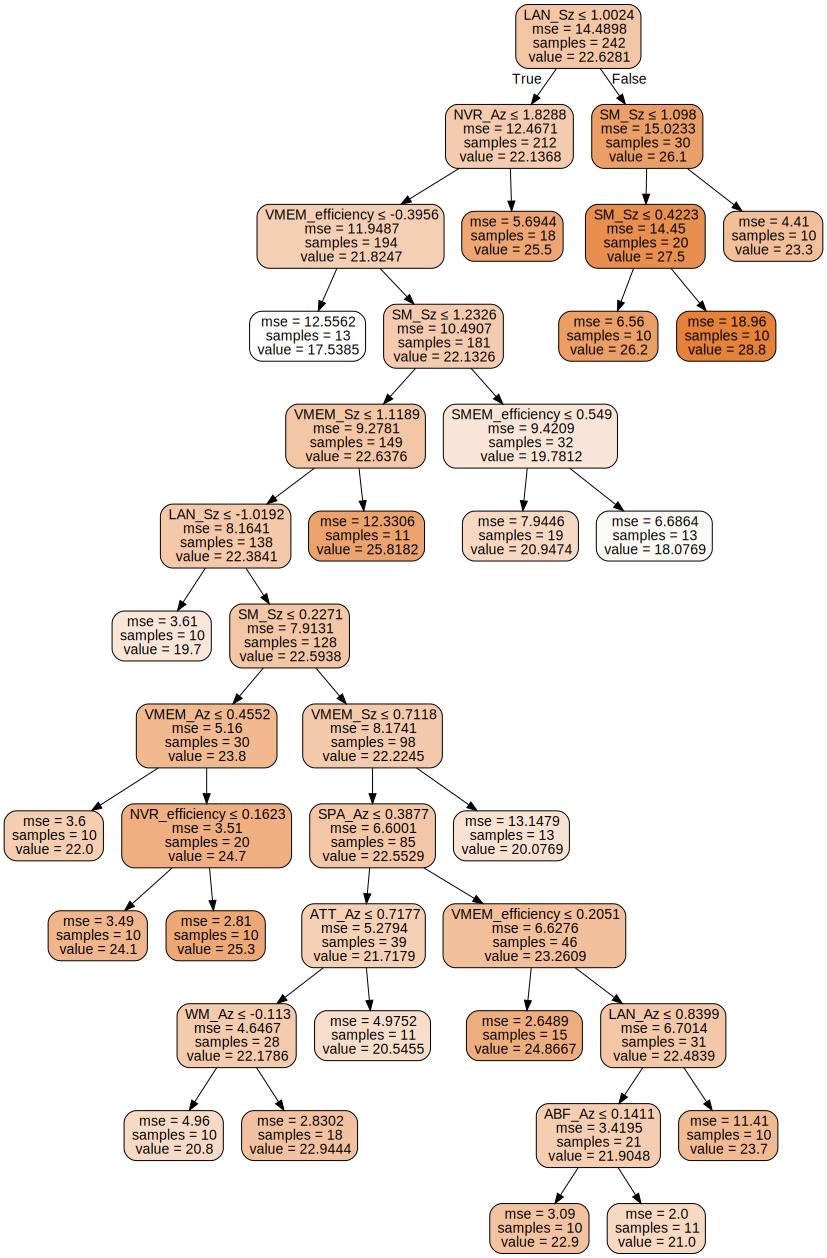

In [77]:
# load data
X = ScienceScores.loc[:, ScienceScores.columns.str.contains('_Az|_Sz|_EFFICIENCY|_efficiency')].copy()
y = ScienceScores.loc[:, 'ScienceScaledScore'].copy()

# Build final tree with min_sample = 10
foo = tree.DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=10)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

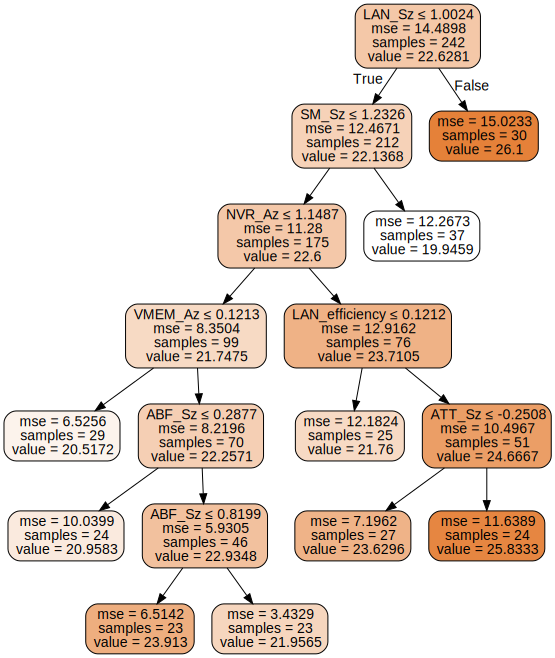

In [78]:
# Build final tree with min_sample = 20
foo = tree.DecisionTreeRegressor(min_samples_split=20, min_samples_leaf=20)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

## Science - Removed extra time students

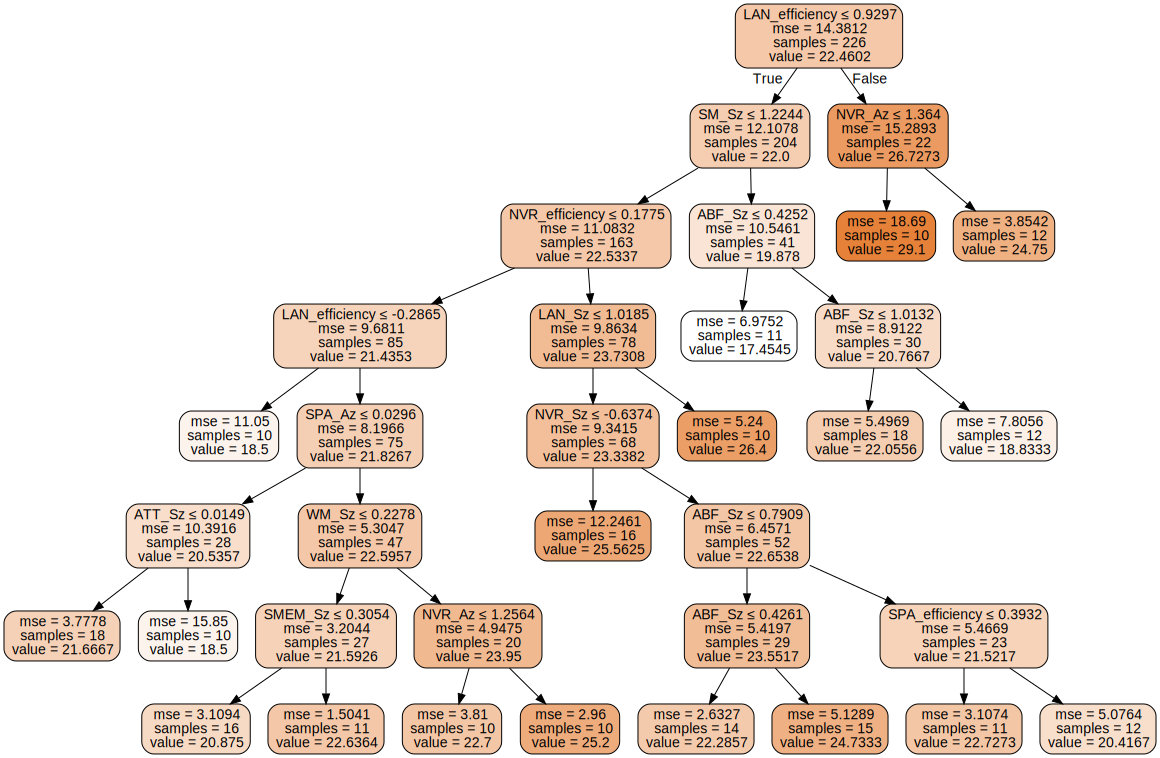

In [79]:
# load data
# drop students who received extra time
mp2 = ScienceScores[ScienceScores.ExtraTime != 1]

X = mp2.loc[:, mp2.columns.str.contains('_Az|_Sz|_EFFICIENCY|_efficiency')].copy()
y = mp2.loc[:, 'ScienceScaledScore'].copy()

# Build final tree with min_sample = 10
foo = tree.DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=10)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

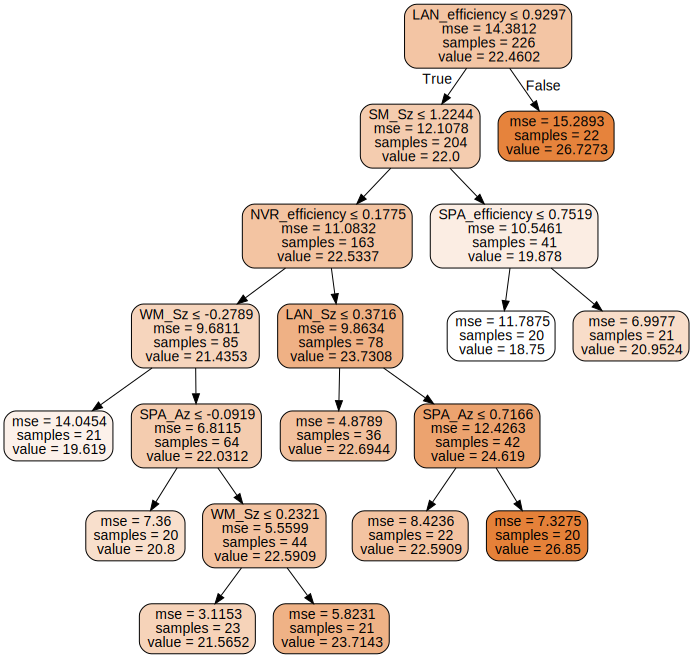

In [80]:
# Build final tree with min_sample = 20
foo = tree.DecisionTreeRegressor(min_samples_split=20, min_samples_leaf=20)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

## English

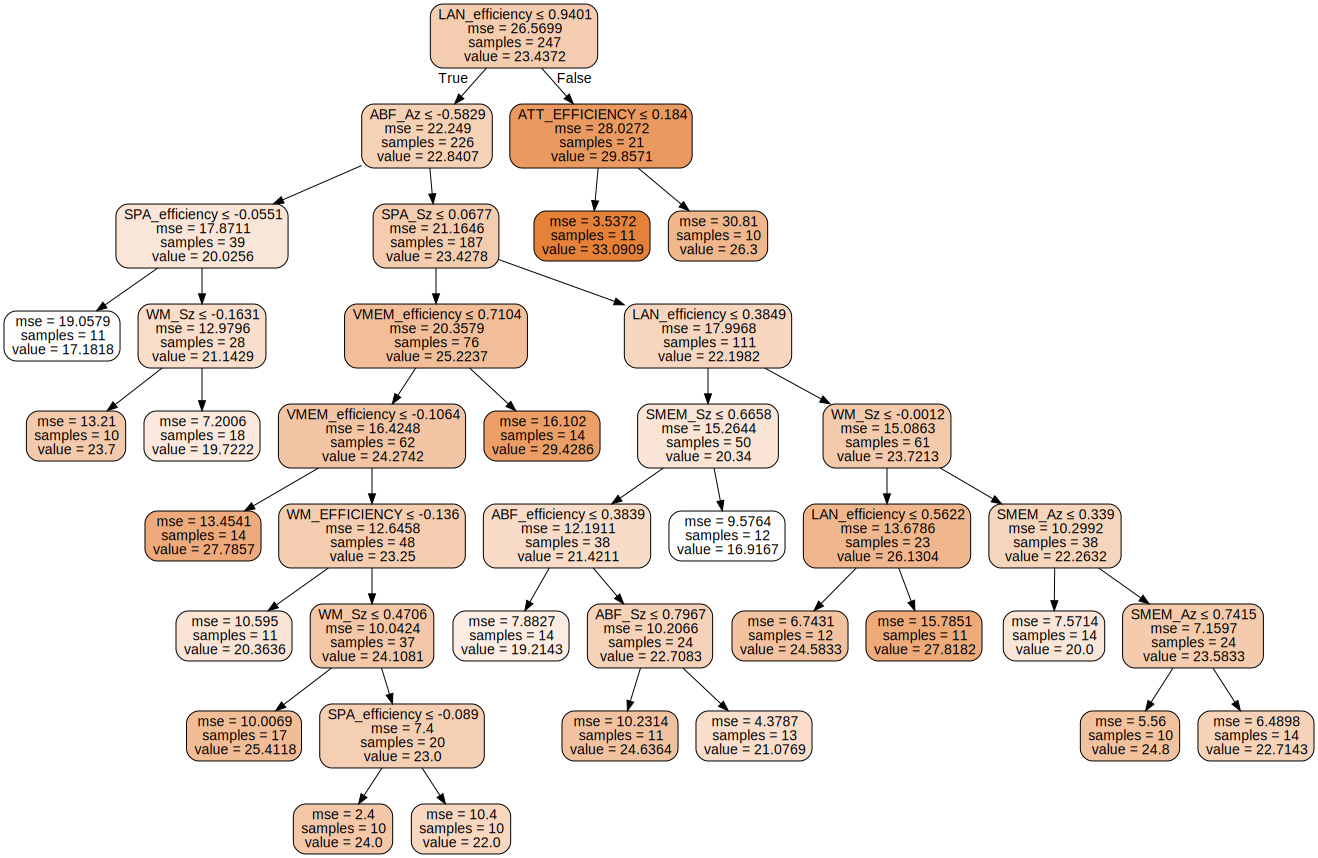

In [81]:
# load data
X = EngScores.loc[:, EngScores.columns.str.contains('_Az|_Sz|_EFFICIENCY|_efficiency')].copy()
y = EngScores.loc[:, 'EngScaledScore'].copy()

# Build final tree with min_sample = 10
foo = tree.DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=10)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

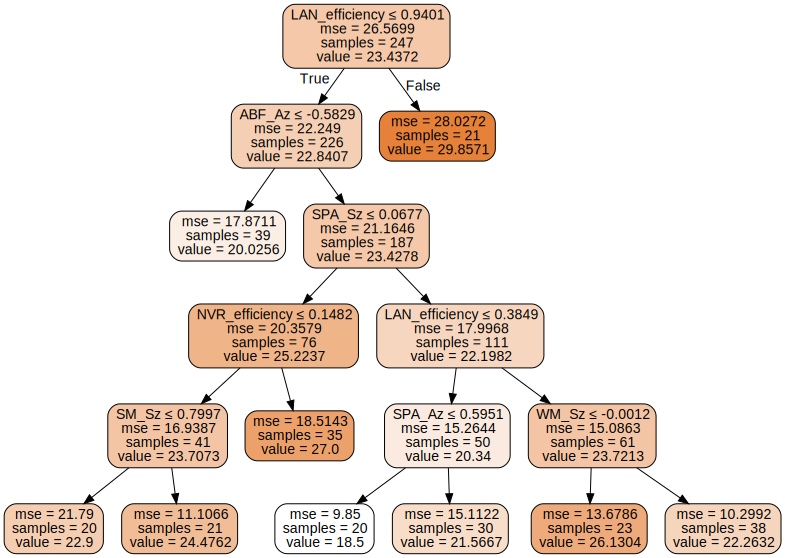

In [82]:
# Build final tree with min_sample = 20
foo = tree.DecisionTreeRegressor(min_samples_split=20, min_samples_leaf=20)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

## English - Removed extra time students

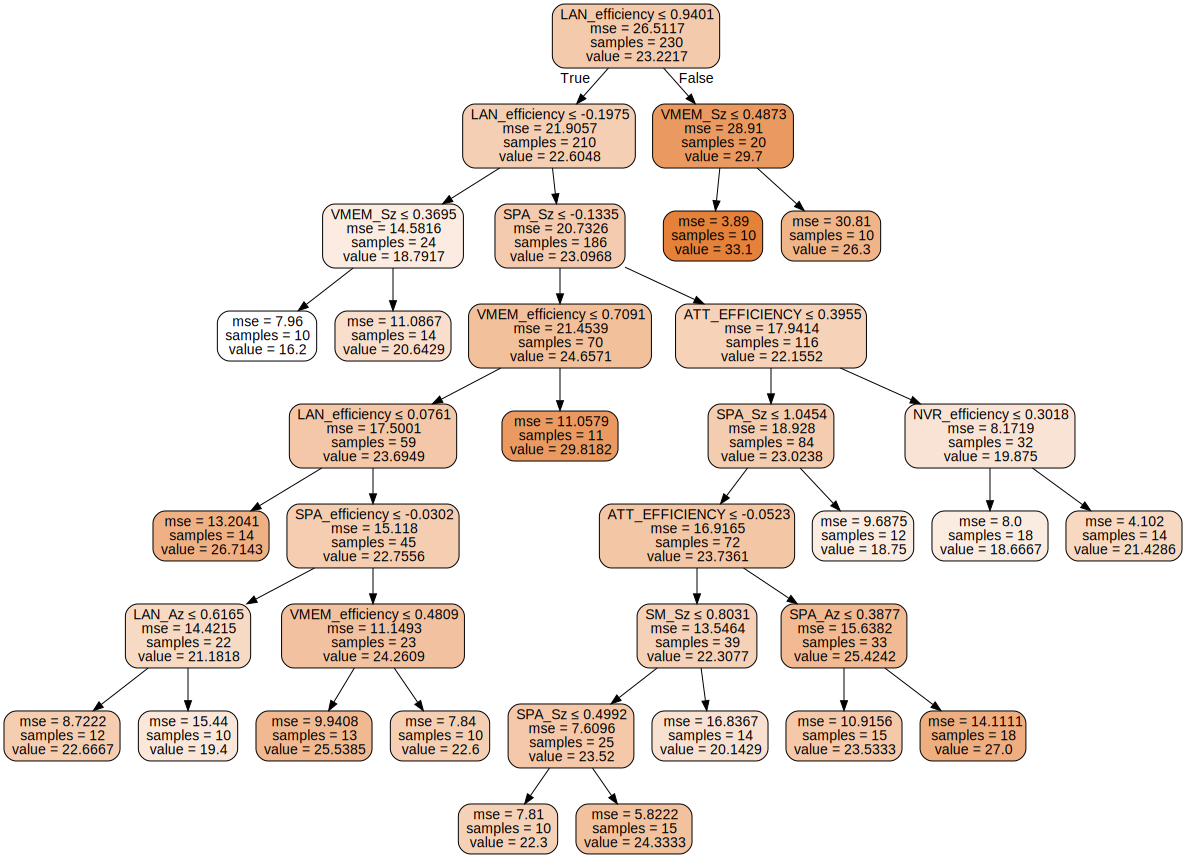

In [83]:
# load data
# drop students who received extra time
mp2 = EngScores[EngScores.ExtraTime != 1]

X = mp2.loc[:, mp2.columns.str.contains('_Az|_Sz|_EFFICIENCY|_efficiency')].copy()
y = mp2.loc[:, 'EngScaledScore'].copy()

# Build final tree with min_sample = 10
foo = tree.DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=10)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph

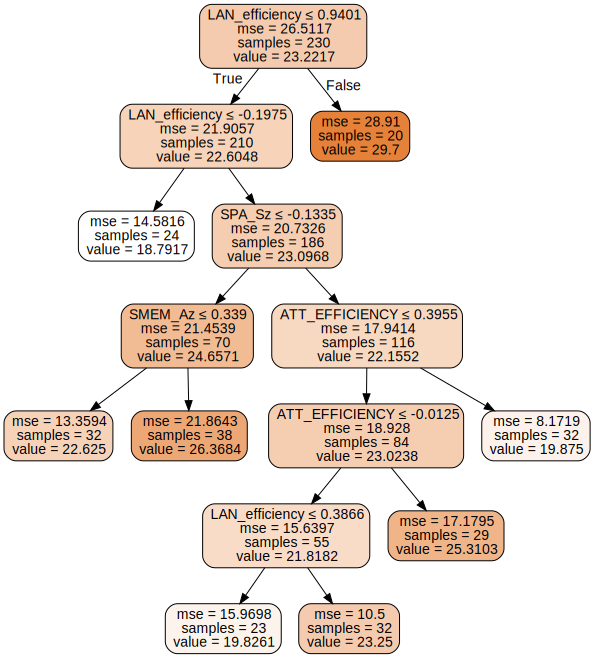

In [84]:
# Build final tree with min_sample = 20
foo = tree.DecisionTreeRegressor(min_samples_split=20, min_samples_leaf=20)  
foo = foo.fit(X, y)
foo2 = tree.export_graphviz(foo, out_file=None, feature_names=X.columns, #class_names=["above", "below"], 
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(foo2)
graph